# CASP15 Interdomain Category Analysis

## Per-target distributions of  ICS, IPS and QSglobal scores on interdomain targets (Figure 6):

In [25]:
# Load required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t

<Figure size 1080x432 with 0 Axes>

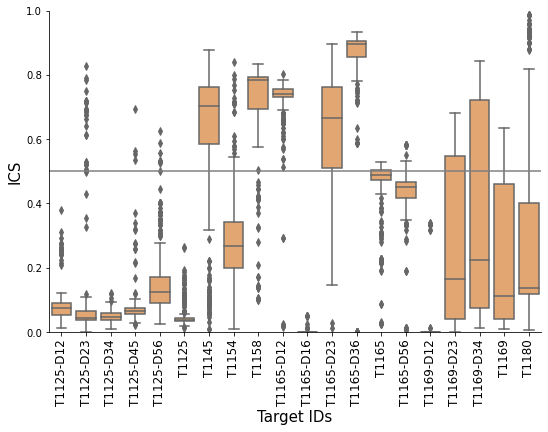

<Figure size 1080x432 with 0 Axes>

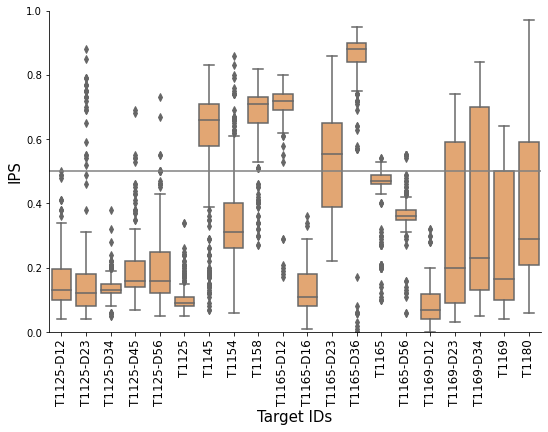

<Figure size 1080x432 with 0 Axes>

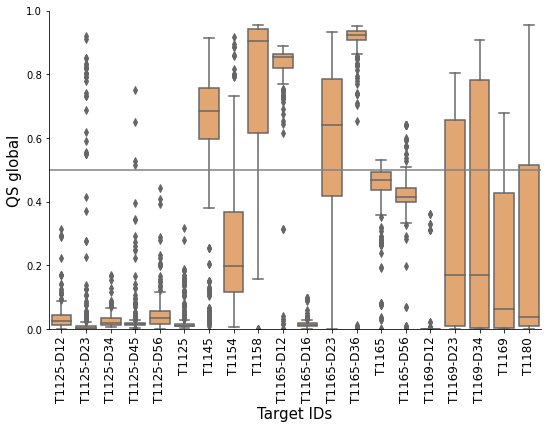

In [7]:
# Load the data and convert F1 range from 0-100 to 0-1
df = pd.read_csv(r"../scorefiles/interdomain/casp15_interdomain_allscores.txt", sep=" ")
df['F1'] = df['F1'] / 100

# Function to create and customize box plots
def create_boxplot(data, y_label, save_filename):
    
    # Size the plot
    plt.figure(figsize=(15, 6))
    sns.catplot(x="target_name", y=data, kind="box", data=df,
                palette=sns.color_palette(['sandybrown']),
                dodge=False, aspect=1.5)
    
    # Edit axis
    locs, labels = plt.xticks()
    plt.ylabel(y_label, fontsize=15)
    plt.ylim(ymin=0, ymax=1)
    plt.xlabel("Target IDs", fontsize=15)
    plt.setp(labels, rotation=90, fontsize=12)
    
    # Add a success threshold line
    ypoints = 0.5
    plt.axhline(ypoints, 0, 1, label='pyplot horizontal line', color='gray')
    
    # Save the plot
    plt.savefig(save_filename, dpi=300, bbox_inches='tight')
                
    plt.show()

    
# Create and display box plots for 'F1', 'Jaccard', and 'QS' columns
# !!!Please ensure the specified save path does not conflict with existing files in your directory, as it may overwrite them.
create_boxplot("F1", "ICS", '../outputfiles/interdomain/casp15_interdomain_ICS_scores_pertarget.png')
create_boxplot("Jaccard", "IPS", '../outputfiles/interdomain/casp15_interdomain_IPS_scores_pertarget.png')
create_boxplot("QS", "QS global", '../outputfiles/interdomain/casp15_interdomain_QS_scores_pertarget.png')

## Performance of CASP15 groups in predicting interfaces of multi-domain targets (Figure 7A):

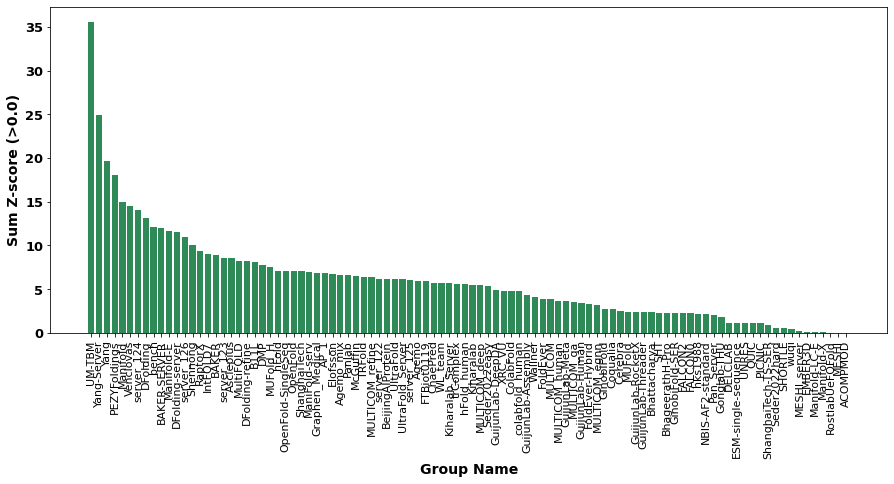

In [14]:
# Load data
df=pd.read_csv(r"../scorefiles/interdomain/casp15_interdomain_zscores.txt", sep=" ")

# Create a new figure for the plot
fig = plt.figure(figsize=(15, 6))

# Create a bar plot using group names (x-axis) and z-scores (y-axis)
plt.bar(df['gr_name'], df['z-score'], color='seagreen')

# Customize x-axis labels with rotation and fontsize
plt.xticks(rotation=90, fontsize=11)

# Customize y-axis labels with fontsize and bold fontweight
plt.yticks(fontsize=13, fontweight='bold')

# Add labels to the x-axis and y-axis
plt.xlabel("Group Name", fontsize=14, fontweight="bold")
plt.ylabel("Sum Z-score (>0.0)", fontsize=14, fontweight="bold")

# Save the plot 
# !!!Please ensure the specified save path does not conflict with existing files in your directory, as it may overwrite them.
plt.savefig('../outputfiles/interdomain/casp15_interdomain_zscore_group_rankings.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

## Average z-scores per target of CASP15 groups in predicting interfaces of multi-domain targets (Figure S8):

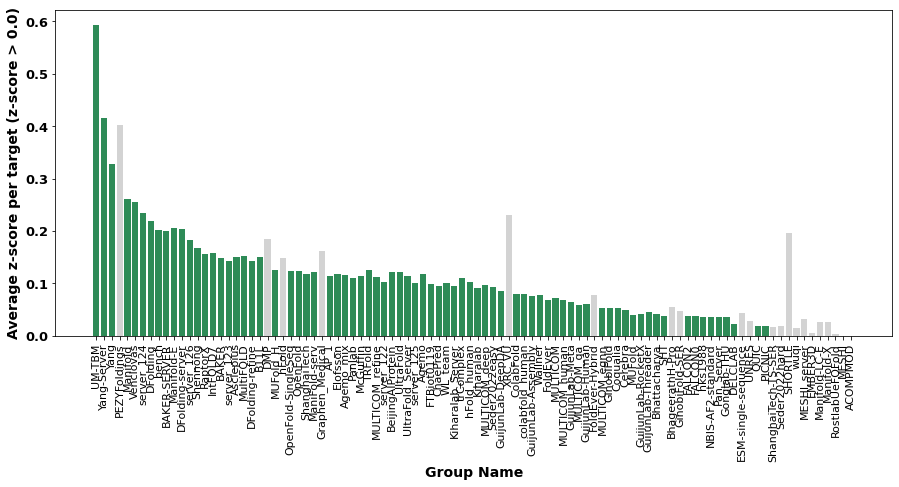

In [21]:
# Load data
df = pd.read_csv(r"../scorefiles/interdomain/casp15_interdomain_zscores.txt", sep=" ")

color_palette = []

for _, row in df.iterrows():
    if row['number_of_targets'] < 17:
        color_palette.append('lightgray')  # Color as light gray for fewer targets
    else:
        color_palette.append('seagreen')  # Color as sea green for other cases

# Create a figure for the plot
plt.figure(figsize=(15, 6))

# Bar plot with the specified color palette
plt.bar(df['gr_name'], df['avg_zscore_pertarget']/3, color=color_palette)

# Customize x-axis labels with rotation and fontsize
plt.xticks(rotation=90, fontsize=11)

# Customize y-axis labels with fontsize and bold fontweight
plt.yticks(fontsize=13, fontweight='bold')

# Add labels for x-axis and y-axis with fontsize and bold fontweight
plt.xlabel("Group Name", fontsize=14, fontweight='bold')
plt.ylabel("Average z-score per target (z-score > 0.0)", fontsize=14, fontweight='bold')

# Save the plot to the specified file path
# !!!Please ensure the specified save path does not conflict with existing files in your directory, as it may overwrite them.
plt.savefig('../outputfiles/interdomain/casp15_interdomain_average_zscore_per_target_group_rankings.png', dpi=300, bbox_inches='tight')

## The relationship between MSA size (Neff) and model accuracy (ICS scores) (Figure 7E):

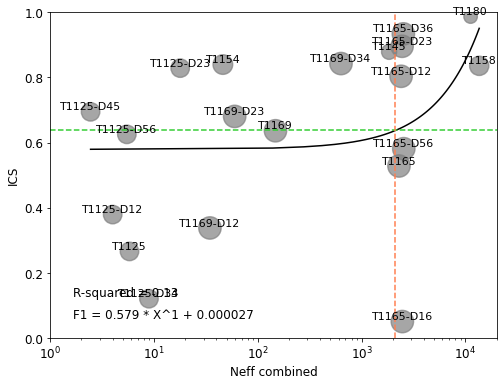

In [26]:
# Load Data
df=pd.read_csv(r"../scorefiles/interdomain/casp15_interdomain_Neff_classification.txt", sep=" ")
df['F1']=df['F1']/100

# Function for creating a scatter plot of ICS vs Neff data with a regression line
def format_equation(coeffs):

    equation = 'F1 = '
    n = len(coeffs) - 1

    for i, coeff in enumerate(coeffs[::-1]):
        if i < n:
            equation += f'{coeff:.3f} * X^{n-i} + '
        else:
            equation += f'{coeff:.6f}'

    return equation

def create_lmplot_poly(df, line_color='limegreen', line_order=2, confidence=0.95, save_path=None):

    
    # Scale the point size based on the assembly length (aa_size)
    # Define the minimum (min_size) and maximum (max_size) values for scaling
    # Map the aa_size values to point sizes between 100 and 500 using linear interpolation
    min_size = 0
    max_size = 2000
    scaled_sizes = np.interp(df['aa_size'], (min_size, max_size), (100, 500))

    # Create a scatter plot
    plt.figure(figsize=(8, 6))
    g = sns.scatterplot(x="Neff_comb", y="F1", data=df, legend=False, alpha=0.7, color="gray", s=scaled_sizes, edgecolor=None)
    ax = g.axes
    plt.xscale("log")

    # Annotate points with target IDs
    for i, txt in enumerate(df['target_name']):
        ax.annotate(txt, (df['Neff_comb'].iloc[i], df['F1'].iloc[i]), fontsize=11, ha='center', va='bottom', color='black')

    # Fit a polynomial regression line
    coeffs = np.polyfit(df['Neff_comb'], df['F1'], line_order)
    x_vals = np.linspace(df['Neff_comb'].min(), df['Neff_comb'].max(), 100)
    y_vals = np.polyval(coeffs, x_vals)
    ax.plot(x_vals, y_vals, color=line_color)

    # Calculate R-squared value
    residuals = df['F1'] - np.polyval(coeffs, df['Neff_comb'])
    ss_residuals = np.sum(residuals ** 2)
    ss_total = np.sum((df['F1'] - np.mean(df['F1'])) ** 2)
    r_squared = 1 - (ss_residuals / ss_total)

    # Add mean values
    ypoints = df["F1"].mean()
    plt.axhline(ypoints, 0, 1, label='Mean F1', color='limegreen', linestyle='--')
    xpoints = df["Neff_comb"].mean()
    plt.axvline(xpoints, 0, 1, label='Mean Neff_comb', color='coral', linestyle='--')

    # Add R-squared and fitted equation to the plot
    equation = format_equation(coeffs)
    r_squared_text = f'R-squared = {r_squared:.2f}'
    ax.text(0.05, 0.05, equation, transform=ax.transAxes, fontsize=12, verticalalignment='bottom')
    ax.text(0.05, 0.12, r_squared_text, transform=ax.transAxes, fontsize=12, verticalalignment='bottom')

    # Set x-axis and y-axis limits
    ax.set_xlim(1, 20000)
    ax.set_ylim(0, 1)
    
    # Set font size for x-axis and y-axis labels
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel("Neff combined", fontsize=12)
    plt.ylabel("ICS", fontsize=12)

    # Save the plot if a save path is provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')

    # Display the plot
    plt.show()

# Example usage
# !!!Please ensure the specified save path does not conflict with existing files in your directory, as it may overwrite them.
create_lmplot_poly(df, line_color='black', line_order=1, confidence=0.95, save_path='../outputfiles/interdomain/casp15_interdomain_neff_vs_f1.png')

